# 1. Logistic Regression Hands-On : Heart Attack Prediction

In [1]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns


In [2]:
df=pd.read_csv("heart.csv")

In [3]:
df.head()

,age,sex,cp,trestbps,chol,fbs,restecg,thalach,exang,oldpeak,slope,ca,thal,target
0,63,1,3,145,233,1,0,150,0,2.3,0,0,1,1
1,37,1,2,130,250,0,1,187,0,3.5,0,0,2,1
2,41,0,1,130,204,0,0,172,0,1.4,2,0,2,1
3,56,1,1,120,236,0,1,178,0,0.8,2,0,2,1
4,57,0,0,120,354,0,1,163,1,0.6,2,0,2,1


In [4]:
df.info()


<class 'pandas.core.frame.DataFrame'>
RangeIndex: 303 entries, 0 to 302
Data columns (total 14 columns):
 #   Column    Non-Null Count  Dtype  
---  ------    --------------  -----  
 0   age       303 non-null    int64  
 1   sex       303 non-null    int64  
 2   cp        303 non-null    int64  
 3   trestbps  303 non-null    int64  
 4   chol      303 non-null    int64  
 5   fbs       303 non-null    int64  
 6   restecg   303 non-null    int64  
 7   thalach   303 non-null    int64  
 8   exang     303 non-null    int64  
 9   oldpeak   303 non-null    float64
 10  slope     303 non-null    int64  
 11  ca        303 non-null    int64  
 12  thal      303 non-null    int64  
 13  target    303 non-null    int64  
dtypes: float64(1), int64(13)
memory usage: 33.3 KB


In [5]:
df.describe()

,age,sex,cp,trestbps,chol,fbs,restecg,thalach,exang,oldpeak,slope,ca,thal,target
count,303.000000,303.000000,303.000000,303.000000,303.000000,303.000000,303.000000,303.000000,303.000000,303.000000,303.000000,303.000000,303.000000,303.000000
mean,54.366337,0.683168,0.966997,131.623762,246.264026,0.148515,0.528053,149.646865,0.326733,1.039604,1.399340,0.729373,2.313531,0.544554
std,9.082101,0.466011,1.032052,17.538143,51.830751,0.356198,0.525860,22.905161,0.469794,1.161075,0.616226,1.022606,0.612277,0.498835
min,29.000000,0.000000,0.000000,94.000000,126.000000,0.000000,0.000000,71.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000
25%,47.500000,0.000000,0.000000,120.000000,211.000000,0.000000,0.000000,133.500000,0.000000,0.000000,1.000000,0.000000,2.000000,0.000000
50%,55.000000,1.000000,1.000000,130.000000,240.000000,0.000000,1.000000,153.000000,0.000000,0.800000,1.000000,0.000000,2.000000,1.000000
75%,61.000000,1.000000,2.000000,140.000000,274.500000,0.000000,1.000000,166.000000,1.000000,1.600000,2.000000,1.000000,3.000000,1.000000
max,77.000000,1.000000,3.000000,200.000000,564.000000,1.000000,2.000000,202.000000,1.000000,6.200000,2.000000,4.000000,3.000000,1.000000


In [10]:
df.target.value_counts()

target
1    165
0    138
Name: count, dtype: int64

In [11]:
df.isna().sum()

age         0
sex         0
cp          0
trestbps    0
chol        0
fbs         0
restecg     0
thalach     0
exang       0
oldpeak     0
slope       0
ca          0
thal        0
target      0
dtype: int64

In [15]:
df.duplicated().sum()

0

In [14]:
df.drop_duplicates(inplace=True)

<ipython-input-30-538a9698add7>:1: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.countplot(x="target",data=df,palette='hls')


<Axes: xlabel='target', ylabel='count'>

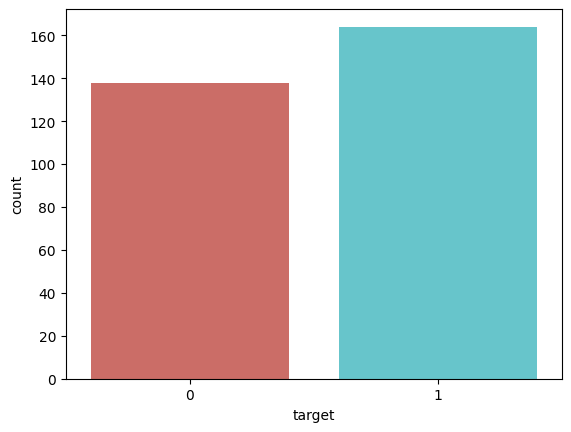

In [30]:
sns.countplot(x="target",data=df,palette='hls')

<ipython-input-31-850cf0e87243>:1: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.countplot(x='sex',data=df,palette='hls')


<Axes: xlabel='sex', ylabel='count'>

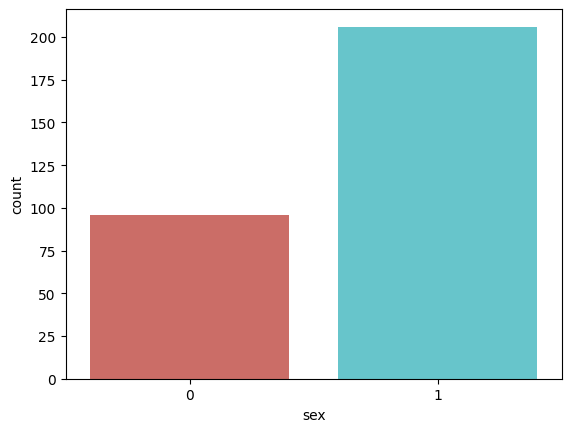

In [31]:
sns.countplot(x='sex',data=df,palette='hls')

In [17]:
x=df.iloc[:,:-1]
y=df.iloc[:,-1]

In [20]:
from sklearn.model_selection import train_test_split
x_train,x_test,y_train,y_test=train_test_split(x,y,test_size=0.2,random_state=111)

In [22]:
from sklearn.linear_model import LogisticRegression
logreg=LogisticRegression()
logreg.fit(x_train,y_train)

/usr/local/lib/python3.10/dist-packages/sklearn/linear_model/_logistic.py:458: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
Please also refer to the documentation for alternative solver options:
    https://scikit-learn.org/stable/modules/linear_model.html#logistic-regression
  n_iter_i = _check_optimize_result(


LogisticRegression()

In [23]:
logreg.score(x_test,y_test)

0.9016393442622951

In [24]:
from sklearn.metrics import confusion_matrix,classification_report,accuracy_score

In [25]:
log_pred=logreg.predict(x_test)

In [28]:
print("Confusion Matrix: ", confusion_matrix(y_test,log_pred))
print("Classification Report: \n", classification_report(y_test,log_pred))
print("Accuracy Score: ",accuracy_score(y_test,log_pred))

Confusion Matrix:  [[19  2]
 [ 4 36]]
Classification Report: 
               precision    recall  f1-score   support

           0       0.83      0.90      0.86        21
           1       0.95      0.90      0.92        40

    accuracy                           0.90        61
   macro avg       0.89      0.90      0.89        61
weighted avg       0.91      0.90      0.90        61

Accuracy Score:  0.9016393442622951


# 2. Logistic Regression Hands-On: HR Report on Attrition Rate

In [32]:
df2=pd.read_csv("HR_comma_sep.csv")

In [33]:
df2.head()

,satisfaction_level,last_evaluation,number_project,average_montly_hours,time_spend_company,Work_accident,left,promotion_last_5years,Department,salary
0,0.38,0.53,2,157,3,0,1,0,sales,low
1,0.80,0.86,5,262,6,0,1,0,sales,medium
2,0.11,0.88,7,272,4,0,1,0,sales,medium
3,0.72,0.87,5,223,5,0,1,0,sales,low
4,0.37,0.52,2,159,3,0,1,0,sales,low


In [34]:
df2.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 14999 entries, 0 to 14998
Data columns (total 10 columns):
 #   Column                 Non-Null Count  Dtype  
---  ------                 --------------  -----  
 0   satisfaction_level     14999 non-null  float64
 1   last_evaluation        14999 non-null  float64
 2   number_project         14999 non-null  int64  
 3   average_montly_hours   14999 non-null  int64  
 4   time_spend_company     14999 non-null  int64  
 5   Work_accident          14999 non-null  int64  
 6   left                   14999 non-null  int64  
 7   promotion_last_5years  14999 non-null  int64  
 8   Department             14999 non-null  object 
 9   salary                 14999 non-null  object 
dtypes: float64(2), int64(6), object(2)
memory usage: 1.1+ MB


In [35]:
df2.describe()

,satisfaction_level,last_evaluation,number_project,average_montly_hours,time_spend_company,Work_accident,left,promotion_last_5years
count,14999.000000,14999.000000,14999.000000,14999.000000,14999.000000,14999.000000,14999.000000,14999.000000
mean,0.612834,0.716102,3.803054,201.050337,3.498233,0.144610,0.238083,0.021268
std,0.248631,0.171169,1.232592,49.943099,1.460136,0.351719,0.425924,0.144281
min,0.090000,0.360000,2.000000,96.000000,2.000000,0.000000,0.000000,0.000000
25%,0.440000,0.560000,3.000000,156.000000,3.000000,0.000000,0.000000,0.000000
50%,0.640000,0.720000,4.000000,200.000000,3.000000,0.000000,0.000000,0.000000
75%,0.820000,0.870000,5.000000,245.000000,4.000000,0.000000,0.000000,0.000000
max,1.000000,1.000000,7.000000,310.000000,10.000000,1.000000,1.000000,1.000000


In [36]:
df2.isna().sum()

satisfaction_level       0
last_evaluation          0
number_project           0
average_montly_hours     0
time_spend_company       0
Work_accident            0
left                     0
promotion_last_5years    0
Department               0
salary                   0
dtype: int64

In [37]:
df2.duplicated().sum()

3008

In [41]:
df2.shape

(11991, 10)

In [40]:
df2.drop_duplicates(inplace=True)

<ipython-input-42-53472dfd9b24>:1: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.countplot(x="left",data=df2,palette='hls')


<Axes: xlabel='left', ylabel='count'>

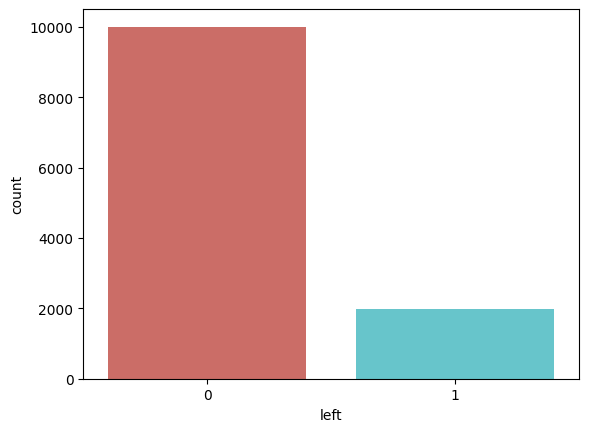

In [42]:
sns.countplot(x="left",data=df2,palette='hls')

<Axes: xlabel='salary'>

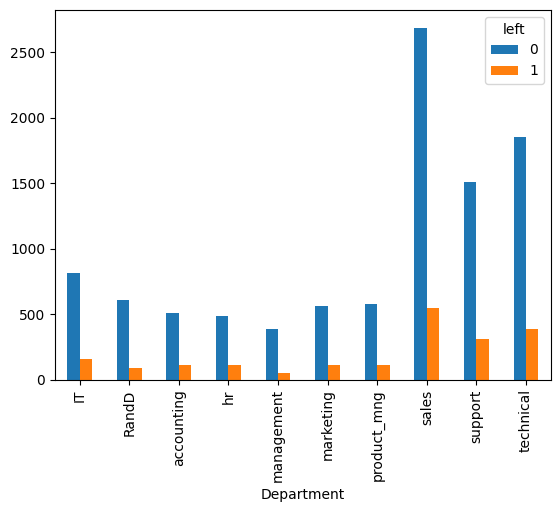

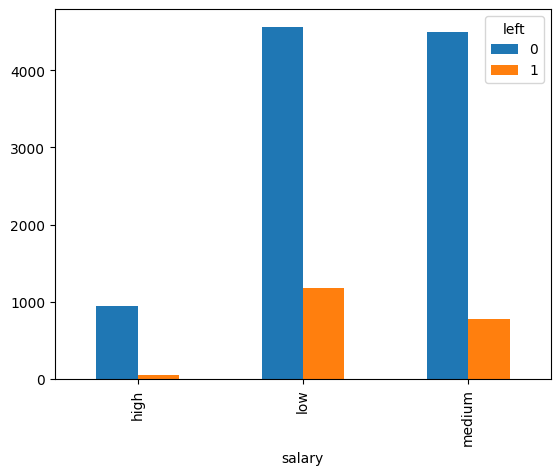

In [44]:
pd.crosstab(df2.Department,df2.left).plot(kind='bar')
pd.crosstab(df2.salary,df2.left).plot(kind='bar')

In [46]:
df2.columns

Index(['satisfaction_level', 'last_evaluation', 'number_project',
       'average_montly_hours', 'time_spend_company', 'Work_accident', 'left',
       'promotion_last_5years', 'Department', 'salary'],
      dtype='object')

In [47]:
df2=df2.loc[:,['satisfaction_level', 'last_evaluation', 'number_project',
       'average_montly_hours', 'time_spend_company', 'Work_accident',
       'promotion_last_5years', 'Department', 'salary','left']]

In [48]:
df2.columns

Index(['satisfaction_level', 'last_evaluation', 'number_project',
       'average_montly_hours', 'time_spend_company', 'Work_accident',
       'promotion_last_5years', 'Department', 'salary', 'left'],
      dtype='object')

In [50]:
df2.info()

<class 'pandas.core.frame.DataFrame'>
Index: 11991 entries, 0 to 11999
Data columns (total 10 columns):
 #   Column                 Non-Null Count  Dtype  
---  ------                 --------------  -----  
 0   satisfaction_level     11991 non-null  float64
 1   last_evaluation        11991 non-null  float64
 2   number_project         11991 non-null  int64  
 3   average_montly_hours   11991 non-null  int64  
 4   time_spend_company     11991 non-null  int64  
 5   Work_accident          11991 non-null  int64  
 6   promotion_last_5years  11991 non-null  int64  
 7   Department             11991 non-null  object 
 8   salary                 11991 non-null  object 
 9   left                   11991 non-null  int64  
dtypes: float64(2), int64(6), object(2)
memory usage: 1.0+ MB


In [58]:
salary_dumm=pd.get_dummies(new_df['salary'],prefix='salary')
salary_dumm

,salary_high,salary_low,salary_medium
0,False,True,False
1,False,False,True
2,False,False,True
3,False,True,False
4,False,True,False
...,...,...,...
11995,True,False,False
11996,True,False,False
11997,True,False,False
11998,True,False,False


In [54]:
new_df=df2[["satisfaction_level","average_montly_hours","time_spend_company","promotion_last_5years",'salary']]

In [60]:
new_df['salary'].value_counts()

salary
low       5740
medium    5261
high       990
Name: count, dtype: int64

In [59]:
df_with_dumm=pd.concat([new_df,salary_dumm],axis="columns")

In [61]:
df_with_dumm

,satisfaction_level,average_montly_hours,time_spend_company,promotion_last_5years,salary,salary_high,salary_low,salary_medium
0,0.38,157,3,0,low,False,True,False
1,0.80,262,6,0,medium,False,False,True
2,0.11,272,4,0,medium,False,False,True
3,0.72,223,5,0,low,False,True,False
4,0.37,159,3,0,low,False,True,False
...,...,...,...,...,...,...,...,...
11995,0.90,259,10,1,high,True,False,False
11996,0.74,266,10,1,high,True,False,False
11997,0.85,185,10,1,high,True,False,False
11998,0.33,172,10,1,high,True,False,False


In [69]:
x=df_with_dumm
y=df2.left

In [67]:
from sklearn.preprocessing import LabelEncoder
le=LabelEncoder()
df_with_dumm['salary']=le.fit_transform(df_with_dumm['salary'])
df_with_dumm

,satisfaction_level,average_montly_hours,time_spend_company,promotion_last_5years,salary,salary_high,salary_low,salary_medium
0,0.38,157,3,0,1,False,True,False
1,0.80,262,6,0,2,False,False,True
2,0.11,272,4,0,2,False,False,True
3,0.72,223,5,0,1,False,True,False
4,0.37,159,3,0,1,False,True,False
...,...,...,...,...,...,...,...,...
11995,0.90,259,10,1,0,True,False,False
11996,0.74,266,10,1,0,True,False,False
11997,0.85,185,10,1,0,True,False,False
11998,0.33,172,10,1,0,True,False,False


In [68]:
df_with_dumm.drop(columns=['salary_high','salary_low','salary_medium'],axis=1,inplace=True)

In [70]:
from sklearn.model_selection import train_test_split
x_train,x_test,y_train,y_test=train_test_split(x,y,test_size=0.3)

In [71]:
from sklearn.linear_model import LogisticRegression
logreg=LogisticRegression()
logreg.fit(x_train,y_train)


LogisticRegression()

In [73]:
from sklearn.metrics import confusion_matrix,classification_report,accuracy_score

In [74]:
log_pred2=logreg.predict(x_test)

In [75]:
print("Confusion Matrix: ", confusion_matrix(y_test,log_pred2))
print("Classification Report: \n", classification_report(y_test,log_pred2))
print("Accuracy Score: ",accuracy_score(y_test,log_pred2))

Confusion Matrix:  [[2900   85]
 [ 464  149]]
Classification Report: 
               precision    recall  f1-score   support

           0       0.86      0.97      0.91      2985
           1       0.64      0.24      0.35       613

    accuracy                           0.85      3598
   macro avg       0.75      0.61      0.63      3598
weighted avg       0.82      0.85      0.82      3598

Accuracy Score:  0.8474152306837132
